In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [2]:
beer = pd.read_csv('poisson-regression.csv')
beer.head(3)

,beer_number,temperature
0,6,17.5
1,11,26.6
2,2,5.0


In [3]:
mod_pois = smf.glm(
    'beer_number~temperature',
    beer,
    family=sm.families.Poisson()
).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sat, 05 Jan 2019   Deviance:                       5.1373
Time:                        06:39:57   Pearson chi2:                     5.40
No. Iterations:                     4   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [4]:
mod_pois_null = smf.glm(
    'beer_number~1',
    data=beer,
    family=sm.families.Poisson()
).fit()

In [5]:
# Nullモデル
mod_pois_null.aic.round(3)

223.363

In [6]:
# 変数入りモデル
mod_pois.aic.round(3)

119.343

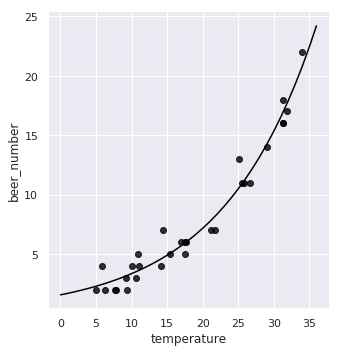

In [7]:
x_plot = np.arange(0, 37)
pred = mod_pois.predict(
    pd.DataFrame({'temperature': x_plot})
)
sns.lmplot(
    y='beer_number',
    x='temperature',
    data=beer,
    fit_reg=False,
    scatter_kws={'color': 'black'}
)
plt.plot(x_plot, pred, color='black')

In [8]:
exp_val_1 = pd.DataFrame({'temperature': [1]})
pred_1 = mod_pois.predict(exp_val_1)
exp_val_2 = pd.DataFrame({'temperature': [2]})
pred_2 = mod_pois.predict(exp_val_2)

pred_2 / pred_1

0    1.079045
dtype: float64

In [9]:
sp.exp(mod_pois.params['temperature'])

1.079045054586893